In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error

https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data

In [2]:
# Chargement des données
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
oil = pd.read_csv("oil.csv")
holidays = pd.read_csv("holidays_events.csv")
stores = pd.read_csv("stores.csv")

In [3]:
train

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [4]:
len(train)

3000888

In [5]:
train['sales'].mean()

357.77574911262707

In [6]:
test

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


In [7]:
oil

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [8]:
holidays

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [9]:
stores

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [10]:
# Feature engineering
train['year'] = pd.to_datetime(train['date']).dt.year
train['month'] = pd.to_datetime(train['date']).dt.month
train['day'] = pd.to_datetime(train['date']).dt.day

In [11]:
train

,id,date,store_nbr,family,sales,onpromotion,year,month,day
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,2013,1,1
1,1,2013-01-01,1,BABY CARE,0.000,0,2013,1,1
2,2,2013-01-01,1,BEAUTY,0.000,0,2013,1,1
3,3,2013-01-01,1,BEVERAGES,0.000,0,2013,1,1
4,4,2013-01-01,1,BOOKS,0.000,0,2013,1,1
...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,2017,8,15
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,2017,8,15
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,2017,8,15
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,2017,8,15


In [12]:
# Gestion des valeurs manquantes
# Vérifier les valeurs manquantes dans l'ensemble de données d'entraînement
missing_values_train = train.isnull().sum()

#Vérifier les valeurs manquantes dans l'ensemble de données de test
missing_values_test = test.isnull().sum()

print("Missing values in the train dataset:")
print(missing_values_train)

print("\nMissing values in the test dataset:")
print(missing_values_test)

Missing values in the train dataset:
id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
year           0
month          0
day            0
dtype: int64

Missing values in the test dataset:
id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64


In [13]:
# remplissage des emplacement manquants avec la valeur moyenne
train['sales'].fillna(train['sales'].mean(), inplace=True)
test['onpromotion'].fillna(test['onpromotion'].mean(), inplace=True)

In [14]:
# Traitement holidays and events
train['is_holiday'] = train['date'].isin(holidays['date'])
test['is_holiday'] = test['date'].isin(holidays['date'])

# Traitement oil prices
train = train.merge(oil, on='date', how='left')
test = test.merge(oil, on='date', how='left')

In [15]:
#split Train-validation
train_data, val_data = train_test_split(train, test_size=0.2, random_state=42)

In [16]:
features = [
    'store_nbr',
    'onpromotion',
]

target = 'sales'

In [17]:
print(train_data.columns)

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'year',
       'month', 'day', 'is_holiday', 'dcoilwtico'],
      dtype='object')


In [18]:
# Modèle de Random Forest
model = RandomForestRegressor(n_estimators=5, random_state=42)
model.fit(train_data[features], train_data[target])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
                      oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [19]:
# predictions sur le set de validation
val_predictions = model.predict(val_data[features])
val_predictions

array([3384.22699719,    3.88914956,  638.15304083, ...,  112.80606931,
        596.12398745, 1013.24094619])

In [20]:
# Calcul RMSLE
rmsle = np.sqrt(mean_squared_log_error(val_data[target], val_predictions))
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle}")

Root Mean Squared Logarithmic Error (RMSLE): 3.175003909535403


In [21]:
print(test.columns)

Index(['id', 'date', 'store_nbr', 'family', 'onpromotion', 'is_holiday',
       'dcoilwtico'],
      dtype='object')


In [22]:
# predictions sur le set de test
test_predictions = model.predict(test[features])
print(test_predictions)

[ 127.31004014  127.31004014  418.71649014 ...  574.70337613 1368.00226618
  217.64331721]


In [23]:
# Création d'un fichier submission
submission = pd.DataFrame({'id': test['id'], 'unit_sales': test_predictions})

TypeError: unhashable type: 'list'

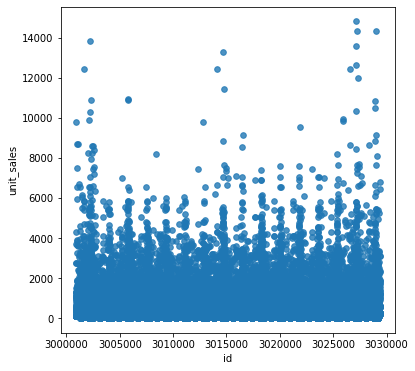

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
    plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
    for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
            ax = plt.subplot(1, len(colname_pairs), plot_i)
            df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
            ax.spines[['top', 'right',]].set_visible(False)
    plt.tight_layout()
    plt.show()

chart = scatter_plots(submission, *[[['id', 'unit_sales']]], **{})
chart

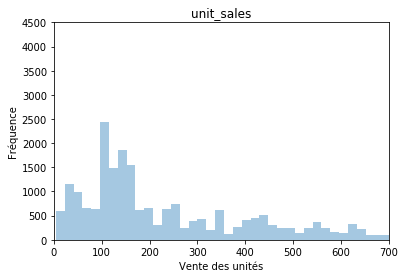

In [25]:

import seaborn as sns
sns.distplot(submission['unit_sales'], bins=800, kde=False)
plt.title('unit_sales')
plt.xlabel('Vente des unités')
plt.ylabel('Fréquence')
plt.xlim(0, 700)
plt.ylim(0, 4500)
plt.show()


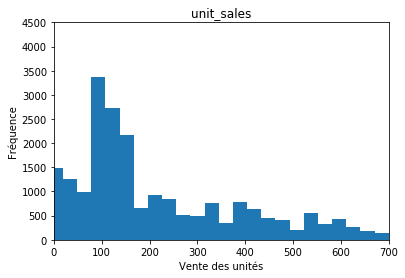

In [26]:

import matplotlib.pyplot as plt
hist, bins = np.histogram(submission['unit_sales'], bins=500)
plt.bar(bins[:-1], hist, width=(bins[1]-bins[0]))
plt.title('unit_sales')
plt.xlabel('Vente des unités')
plt.ylabel('Fréquence')
plt.xlim(0, 700)
plt.ylim(0, 4500)
plt.show()

In [27]:
submission.to_csv('submission.csv', index=False)